<a href="https://colab.research.google.com/github/Andro2k/Metodos-Numericos/blob/main/Examen2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examen 2**

## **Ejercicio 2**

In [ ]:
import numpy as np

# Coeficientes del polinomio
coefficients = [1, -6, 2, 20, -27, 10]

# Encontrar las raíces del polinomio
roots = np.roots(coefficients)

roots.sort()
for i, root in enumerate(roots, start=1):
    print(f"x{i} = {root}")


x1 = (-1.9999999999999998+0j)
x2 = (0.9999957185960304-7.415641477653477e-06j)
x3 = (0.9999957185960304+7.415641477653477e-06j)
x4 = (1.000008562807938+0j)
x5 = (4.999999999999993+0j)


## **Ejercicio 3**

In [ ]:
from typing import Callable # Import the Callable type hint

# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]], # Now Callable is defined
) -> None:
    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."
    n = len(xs)
    num_pars = len(gradiente)
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)
    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."
        Ab[i, :] = der_parcial(xs, ys)
    params, _, _, _ = np.linalg.lstsq(Ab[:, :-1], Ab[:, -1], rcond=None)
    return params

(1.0055015091220207, -4.946213605978655, 5.717269480297421)


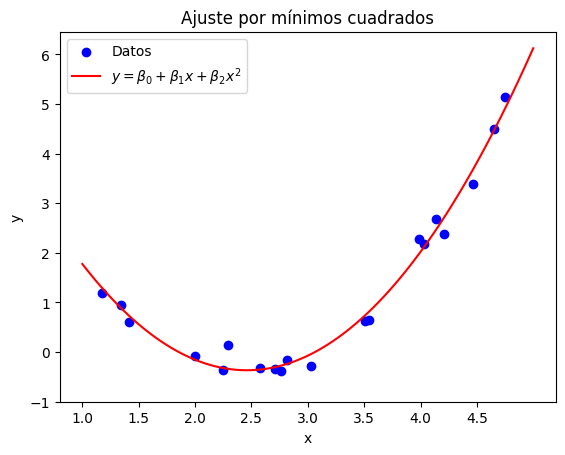

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Implementación de las derivadas parciales para el ajuste cuadrático
def der_parcial_0_parabol(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**2 for x in xs)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return c_2, c_1, c_0, c_ind

def der_parcial_1_parabol(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**3 for x in xs)
    c_1 = sum(x**2 for x in xs)
    c_0 = sum(xs)
    c_ind = sum(y * x for x, y in zip(xs, ys))
    return c_2, c_1, c_0, c_ind

def der_parcial_2_parabol(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**4 for x in xs)
    c_1 = sum(x**3 for x in xs)
    c_0 = sum(x**2 for x in xs)
    c_ind = sum(y * x**2 for x, y in zip(xs, ys))
    return c_2, c_1, c_0, c_ind

# Definición de la función parabólica
def parabola(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

# Función para ajustar por mínimos cuadrados
def ajustar_min_cuadrados(xs, ys, gradiente):
    A = []
    b = []
    for grad in gradiente:
        coef = grad(xs, ys)
        A.append(coef[:-1])
        b.append(coef[-1])

    A = np.array(A)
    b = np.array(b)

    params = np.linalg.solve(A, b)

    return tuple(params)

# Conjunto de datos
xs = [
    1.1715, 1.3396, 1.4163, 1.9962, 2.2523, 2.2947, 2.5793, 2.7054, 2.7635, 2.8200,
    3.0317, 3.5111, 3.5393, 3.9829, 4.0323, 4.1353, 4.2084, 4.4683, 4.6509, 4.7489,
]
ys = [
    1.1902, 0.9564, 0.6078, -0.0856, -0.3550, 0.1355, -0.3171, -0.3425, -0.3758, -0.1518,
    -0.2767, 0.6251, 0.6447, 2.2733, 2.1789, 2.6781, 2.3818, 3.3786, 4.4971, 5.1431,
]

# Ajuste de los datos a una parábola
pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_2_parabol, der_parcial_1_parabol, der_parcial_0_parabol])
print(pars)  # parámetros de la curva ajustada

# Graficar la función cuadrática ajustada y los puntos dados
x = np.linspace(1, 5, 100)
y = [parabola(xi, pars) for xi in x]

plt.scatter(xs, ys, label="Datos", color="blue")
plt.plot(x, y, color="red", label=r"$y = \beta_0 + \beta_1 x + \beta_2 x^2$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()

# Ajustar los ticks de los ejes
plt.xticks(np.arange(1, 5, 0.5))
plt.yticks(np.arange(-1, 7, 1))

plt.show()


## **Ejercicio 5**

In [ ]:
def inv_matrix(A: np.ndarray) -> np.ndarray:
    """Inversión de una matriz cuadrada mediante método de Gauss-Jordan.

    ## Parameters
    ``A``: matriz cuadrada de tamaño n x n.

    ## Return
    ``A_inv``: matriz inversa de A.
    """
    n = A.shape[0]
    # Crear la matriz identidad
    I = np.eye(n)
    # Crear la matriz aumentada [A | I]
    Ab = np.hstack((A, I))

    # Aplicar el método de Gauss-Jordan
    for i in range(0, n):
        # --- Encontrar pivote
        p = None
        for pi in range(i, n):
            if Ab[pi, i] == 0:
                continue
            if p is None:
                p = pi
                continue
            if abs(Ab[pi, i]) < abs(Ab[p, i]):
                p = pi

        if p is None:
            raise ValueError("La matriz no es invertible.")

        if p != i:
            # Intercambiar filas
            _aux = Ab[i, :].copy()
            Ab[i, :] = Ab[p, :].copy()
            Ab[p, :] = _aux

        # Normalizar fila
        Ab[i, :] = Ab[i, :] / Ab[i, i]

        # --- Eliminación: loop por fila
        for j in range(n):
            if i == j:
                continue
            m = Ab[j, i]
            Ab[j, :] = Ab[j, :] - m * Ab[i, :]

    # La matriz inversa está en el lado derecho de Ab
    A_inv = Ab[:, n:]
    return A_inv

# Ejemplo de uso
A = np.array([
    [4, 0, 0, 5],
    [1, 0, 4, 0],
    [3, 4, 1, 3],
    [1, 3, 3, 0],
])
print(inv_matrix(A))

[[-36.  45.  60. -80.]
 [  3.  -4.  -5.   7.]
 [  9. -11. -15.  20.]
 [ 29. -36. -48.  64.]]


In [ ]:
A = np.array([
    [0, 0, 0, 0, 0, 0, 1, -1],
    [0, 1, -1, 1, 0, -1, 0, 1],
    [-1, -1, 0, 0, 2, 1, 0, 0],
    [-1, -1, -1, 1, 2, 0, 0, 1],
    [-1, 1, 1, 0, -1, -1, 0, 2],
    [0, 1, 0, 0, -1, -1, 0, 0],
    [1, -1, -1, 1, 2, 1, 0, 2],
    [2, 0, 0, 0, 0, 1, 2, 0],
    [2, 0, 0, 0, 0, 1, 2, 0],
])
print(inv_matrix(A))


ValueError: La matriz no es invertible.

## **Ejercicio 5**

In [83]:

import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, t0, y0, t_final, h):
    """
    Método de Euler para aproximar la solución de una ODE de primer orden.

    f: función que representa la derivada y'(t, y)
    t0: valor inicial de t
    y0: valor inicial de y
    t_final: valor final de t
    h: tamaño del paso

    Retorna una lista de valores t y una lista de valores y aproximados.
    """
    n = int((t_final - t0) / h) + 1
    t_values = np.linspace(t0, t_final, n)
    y_values = np.zeros(n)
    y_values[0] = y0

    for i in range(1, n):
        y_values[i] = y_values[i-1] + h * f(t_values[i-1], y_values[i-1])

    return t_values, y_values

def plot_results(t_values, y_values, title):
    """
    Función para graficar los resultados del método de Euler.

    t_values: lista de valores t
    y_values: lista de valores y
    title: título del gráfico
    """
    plt.plot(t_values, y_values, 'o-', label='Aproximación (Método de Euler)')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

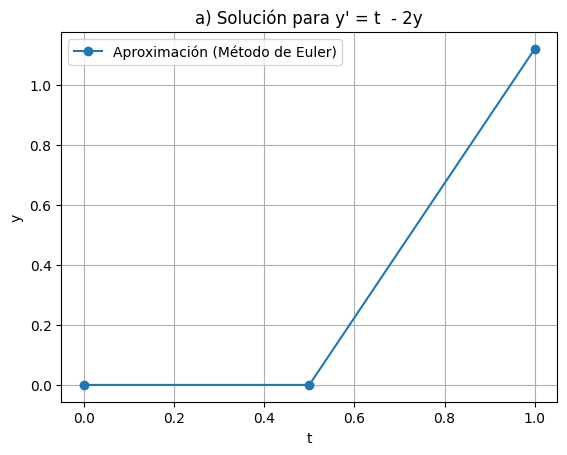

In [86]:

# Definimos la función derivada para el primer caso
def f_a(t, y):
    return t * np.exp(3 * t) - 2 * y

# Resolviendo con el método de Euler
t_values_a, y_values_a = euler_method(f_a, t0=0, y0=0, t_final=1, h=0.5)

# Graficamos los resultados
plot_results(t_values_a, y_values_a, 'a) Solución para y\' = t  - 2y')